In [8]:
using SymPy, Plots
pi, rho , beta= symbols("pi,rho,beta", real = true, positive = true)

(pi, rho, beta)

## Price of Anarchy 
 
There are two computers that send packets to the internet through 2 routers.  The first router is new, while the second is older and tends to drop packets. Each of the computers tries to maximize the probability that its packet gets to the internet

Packets sent to the first router get through for sure as long as there is no congestion. Packets in the second router are transmitted with probability $\beta < 1$ even if there is no congestion.  If two packets arrive at the same router there is congestion.  Then in the first router, a packet is chosen at random (each has probability $\frac{1}{2}$) and set through the router.  The other packet is dropped.  In the second router, if two packets arrive one is chosen at random.  The router tries to send this packet and succeeds with probability $\beta$.  The other packet is dropped.

This game is perfectly symmetric.  So we only need to find one mixing probability, we'll call it $\pi$, with which each of the two computers sends its packet to the first router.  This is just a mixed strategy equilibrium.  So solve
$$\frac{\pi}{2}+(1-\pi) = \pi\beta+(1-\pi)\frac{\beta}{2}$$
to get the Nash equilibrium value of $\pi$ which is $\frac{2-\beta}{\beta+1}$.

In [39]:
nash = solve(pi/2 +(1-pi) -(pi*beta+(1-pi)*beta/2), pi)[1]

2 - β
─────
β + 1

We want to do a little more with this problem - in particular, figure out how the expected number of packets that get through varies with the probability computers use to send their packets to the efficient router. The reason to do this is that we might want to regulate the network by telling the computers the rule they should use to route their packets.  The price of anarchy idea is to calculate the loss associated with letting the computers make their own decisions.  A theorem due to Eva Tardos at Cornell showed that one could put a bound on this loss without  necessarily being able to compute it exactly.

If both use the probability $\pi$, then the expected number of packets that get through is given by the expression
$$\pi^2  +2(1-\pi)\pi(1+\beta)+(1-\pi)^2 \beta$$ 

In [7]:
exp = pi^2+2*(1-pi)*pi*(1+beta)+(1-pi)^2*beta


         2    2                      
β⋅(1 - π)  + π  + π⋅(2 - 2⋅π)⋅(β + 1)

Now lets substitute a value for $\beta$ so we can do some plotting.

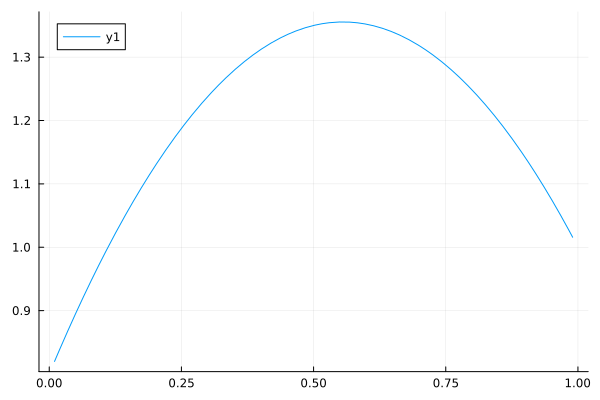

In [12]:
plot(exp(beta => 4/5), 0.01,.99)

It seems that if we want to get the maximal number of packets through the network, then there is a very specific value of $\pi$ that we want, the one where the function above is maximized.

In [27]:
d = diff(exp,pi)


β⋅(2⋅π - 2) - 2⋅π⋅(β + 1) + 2⋅π + (2 - 2⋅π)⋅(β + 1)

In [28]:
best_regulated = solve(d,pi)[1]

  1  
─────
β + 1

Recall that in the Nash equilibrium for this problem, the equilibrium value of $\pi$ is given by 
$$\frac{2-\beta}{1+\beta}.$$
Since $\beta < 1$  computers acting on their own use the efficient router more frequently than a network planner would want them to - there is too much congestion.

Notice also what happens when $\beta$ falls below $\frac{1}{2}$.  In that case the formula for $\pi$ gives a value larger than 1 which means that the second router is a dominated choice - $\pi$  is equal to 1.

The regulator wants the computers to use the strategy $\pi = \frac{2}{3}$ when $\beta$ is exactly $\frac{1}{2}$, and in fact wants them to use the second router no matter how low $\beta$ is.

Alternatively, what we could have done is to substitute the equilibrium mixing probability $\frac{2-\beta}{1+\beta}$ into the same formula so we can see how well an anarchic network performs.

Now we can just draw little graph that compares the two of them.

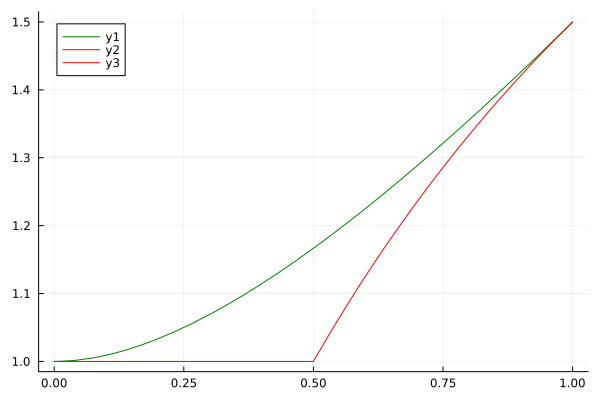

In [48]:
plot(exp(pi => best_regulated),color="green",0,1)
plot!(exp(pi => nash),color="red", .5, 1)
plot!(max(beta,1),color="red", 0, .5)

Now you can compare the performance.  The green line is what a planner would like, while the red line is anarchy.

The price of anarchy logic then says to compute the ratio of the planner's payoff to the Nash payoff.  Notice from the figure that this is when $\beta$ is exactly $\frac{1}{2}$, in which case the ratio is

In [50]:
1/exp(pi => best_regulated, beta => 1/2)

0.857142857142857

The 'worst case' payoff is at least 85% of the payoff achievable by the planner.